In [11]:
# Hermawan - NEVTIK
import requests
import pandas
import csv
import matplotlib.pyplot as plt

In [12]:
shopee_url = "https://shopee.co.id/"
keyword_search = "Xiaomi"
limit = 50  # Max 100 (bug)
official = 1 # Change value to 1 for filterring official store

if official == 1:
    official_shop = "ShopeeMall"
else:
    official_shop = "Shopee"

csv_file = open('{}_{}_{}_CSV.csv'.format(official_shop,keyword_search,limit),'w')
csv_writer = csv.writer(csv_file)

In [13]:
headers = {
    #Change 'User-Agent' equivalent to your browser
    'User-Agent' : "Mozilla/5.0 (X11; Linux x86_64; rv:68.0) Gecko/20100101 Firefox/68.0",
    'referrer' : '{}search?keyword={}'.format(shopee_url,keyword_search)
}

In [14]:
product_list,sold_list,price_list,brand_list,rating,stock,location,price_before_discount = [],[],[],[],[],[],[],[]
columns = ["Product","Brand","Location","Sold","Stock","Rating","Price_Before_Discount","Price"]

class GetID:
    def __init__(self,search,limit,official):
        API_id_url = "https://shopee.co.id/api/v2/search_items/?by=relevancy&keyword={}&limit={}&newest=0&official_mall={}&order=desc&page_type=search&version=2".format(search,limit,official)
        self.api_requests = requests.get(API_id_url,headers = headers).json()
        self.shop_id,self.item_id = [],[]
        for item in self.api_requests["items"]:
            self.item_id.append(item["itemid"])
            self.shop_id.append(item["shopid"])
            
get_item_id = GetID(keyword_search,limit,official).item_id
get_shop_id = GetID(keyword_search,limit,official).shop_id

def get_shopee():
    for index in range(len(get_item_id)):
        API_item_url = "https://shopee.co.id/api/v2/item/get?itemid={}&shopid={}".format(get_item_id[index],get_shop_id[index])
        api_requests = requests.get(API_item_url, headers=headers).json()
        yield api_requests

for i in get_shopee():
    item = i['item']
    product_list.append(item['name'])
    sold_list.append(item['historical_sold'])
    price_list.append(int(str(item['price_min'])[:-5]))
    location.append(item['shop_location'])
    rating.append(round(float(item['item_rating']['rating_star']),1))
    stock.append(item['stock'])
    brand_list.append(item['brand'])
    try: 
        price_before_discount.append(int(str(item['price_before_discount'])[:-5]))
    except: 
        price_before_discount.append(int(str(item['price_min'])[:-5]))

# Writing to CSV and Convert to Excel

In [15]:
product_detail = {"Product":product_list,"Brand":brand_list,"Location":location,"Sold":sold_list,"Stock":stock,"Rating":rating,"Price_Before_Discount":price_before_discount,"Price":price_list}

csv_writer.writerow(columns)

for item_to_csv in range(len(product_list)):
    csv_writer.writerow([product_detail["Product"][item_to_csv],
                         product_detail["Brand"][item_to_csv],
                         product_detail["Location"][item_to_csv],
                         product_detail["Sold"][item_to_csv],
                         product_detail["Stock"][item_to_csv],
                         product_detail["Rating"][item_to_csv],
                         product_detail["Price_Before_Discount"][item_to_csv],
                         product_detail["Price"][item_to_csv]
                        ])
    
csv_file.close()
read_file = pandas.read_csv ('{}_{}_{}_CSV.csv'.format(official_shop,keyword_search,limit))
read_file.to_excel ('{}_{}_{}_Excel.xlsx'.format(official_shop,keyword_search,limit), index = None, header=True)


In [16]:
dataframe = pandas.DataFrame(product_detail)
dataframe.sort_values(by=["Price_Before_Discount"],inplace=True)
dataframe

,Product,Brand,Location,Sold,Stock,Rating,Price_Before_Discount,Price
31,Kivee KV-CT102-1M Kabel Android Micro USB Fast...,Kivee,KOTA JAKARTA PUSAT,74,1677,4.9,15000,13000
6,Hippo Crystal Xiaomi Redmi S2 Tempered Glass T...,Hippo,KOTA JAKARTA BARAT,58,441,4.6,20000,15000
27,Kivee KV-CT011-1V Kabel Data Android Micro USB...,Kivee,KOTA JAKARTA PUSAT,151,900,4.9,23000,19000
44,Kivee KV-CH031-1V Kabel Gold Emas Android Micr...,Kivee,KOTA JAKARTA PUSAT,42,184,5.0,29000,20000
47,ONE-X 2.5D Tempered Glass Xiaomi Redmi 5 Plus ...,Peonia,KOTA BEKASI,64,224,4.8,30000,9990
40,Calandiva Xiaomi Redmi Note 8 Pro Note 7 Redmi...,Calandiva,KOTA BEKASI,1279,74,4.7,30000,17500
24,Calandiva Xiaomi Redmi Note 8 7 5 6 Pro Redmi ...,Calandiva,KOTA BEKASI,3357,845,4.7,50000,30000
11,GOOSPERY Xiaomi mi A2 LITE / Redmi 6 Pro,None,KAB. TANGERANG,2,70,5.0,75000,75000
34,Attanta SMP-22 Tongsis Yunteng GoPro & Xiaomi Yi,Attanta,KAB. TANGERANG,256,95,4.9,80000,60000
38,LOG-ON BATERAI XIAOMI REDMI NOTE 4 BN41,None,KOTA JAKARTA PUSAT,34,283,4.7,92500,83250


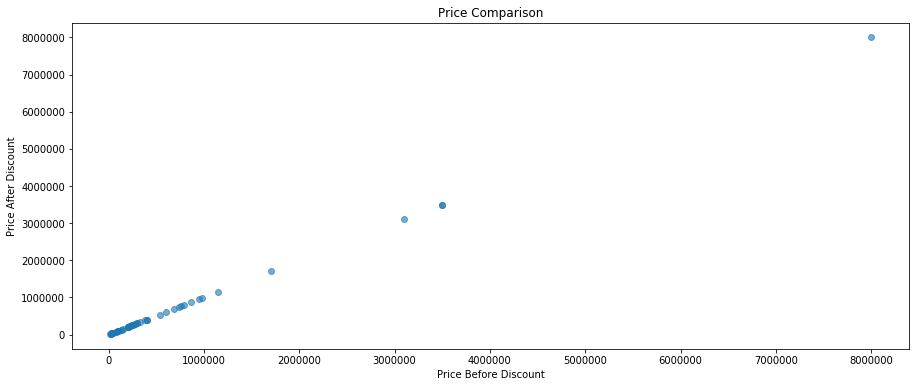

In [17]:

plt.figure(figsize=(15,6))
plt.title("Price Comparison")
plt.xlabel("Price Before Discount");plt.ylabel("Price After Discount")
# plt.plot(dataframe["Price_Before_Discount"],dataframe["Price"])
plt.scatter(dataframe["Price_Before_Discount"],dataframe["Price_Before_Discount"],alpha=0.6)
plt.show()